In [1]:
import torch.utils.data as dt

from misc.processing import *
from misc.displaying import display
from misc.train import train_network
from misc.model_mp_v4 import SegmenterModel

In [2]:
DEVICE_ID = 3
DEVICE = torch.device('cuda:%d' % DEVICE_ID)
torch.cuda.set_device(DEVICE_ID)

In [3]:
train = './d_data/train/'
train_masks = './d_data/train_masks/'
test = './d_data/test/'
test_masks = './d_data/test_masks'

ds = CarvanaDataset(train, train_masks)
ds_test = CarvanaDataset(test, test_masks)
dl = dt.DataLoader(ds, shuffle=True, num_workers=4, batch_size=32)
dl_test = dt.DataLoader(ds_test, shuffle=False, num_workers=1, batch_size=32)

In [4]:
net = SegmenterModel()
schedule = {0:0.001, 80:0.0005, 100:0.00025}
full_loss_train, full_loss_test = train_network(net, dl, dl_test, n_epoch=120, schedule=schedule)

Learning rate:  0.001
Epoch: 0 | Train loss: 0.015571, Test loss: 0.015142
Epoch: 1 | Train loss: 0.012074, Test loss: 0.010320
Epoch: 2 | Train loss: 0.009165, Test loss: 0.009489
Epoch: 3 | Train loss: 0.007418, Test loss: 0.008725
Epoch: 4 | Train loss: 0.006240, Test loss: 0.006755
Epoch: 5 | Train loss: 0.005545, Test loss: 0.006672
Epoch: 6 | Train loss: 0.004850, Test loss: 0.005447
Epoch: 7 | Train loss: 0.004243, Test loss: 0.004435
Epoch: 8 | Train loss: 0.003948, Test loss: 0.004287
Epoch: 9 | Train loss: 0.003579, Test loss: 0.003728
Epoch: 10 | Train loss: 0.003297, Test loss: 0.003459
Epoch: 11 | Train loss: 0.003254, Test loss: 0.003631
Epoch: 12 | Train loss: 0.002851, Test loss: 0.002786
Epoch: 13 | Train loss: 0.002787, Test loss: 0.002766
Epoch: 14 | Train loss: 0.002761, Test loss: 0.002879
Epoch: 15 | Train loss: 0.002621, Test loss: 0.002671
Epoch: 16 | Train loss: 0.002476, Test loss: 0.002556
Epoch: 17 | Train loss: 0.002474, Test loss: 0.002566
Epoch: 18 | Trai

In [5]:
save_model(net, './models/model_mp_4')
save_state(net, './models/state_mp_4')

In [6]:
net = load_state(SegmenterModel, './models/state_mp_4')
net.cuda()

SegmenterModel(
  (downsize): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (conv_h0): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (pool_h): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_m0): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (conv_m1): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (pool_m): MaxPool2d(kernel_size

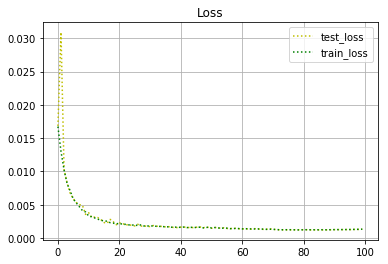

In [7]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.title('Loss')
plt.plot(full_loss_test, 'y:', label = 'test_loss')
plt.plot(full_loss_train, 'g:', label = 'train_loss')
plt.legend()

### Результаты работы

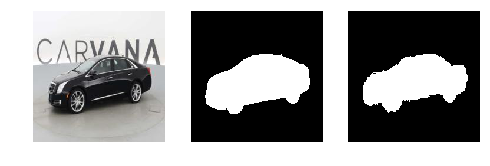

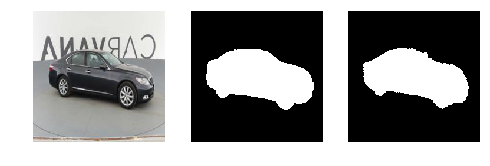

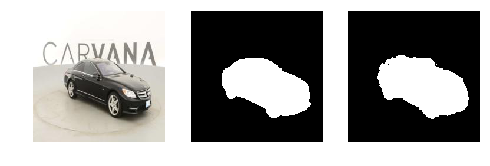

In [16]:
from random import randint
from torch.autograd import Variable

for _ in range(3):
    image, image_mask = ds_test[randint(0, 507)]

    input_ = Variable(image.unsqueeze_(0)).cuda()
    output = net(input_)

    image_mask_guess = class_max(output)
    display((image.squeeze_(0), image_mask, image_mask_guess), figsize=(8,24))